**Historical Simulation to forecast future stock prices**

We will be using Yahoo Finance for the historical data.

In [ ]:
!pip install yfinance numpy matplotlib scipy

In [4]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 

Download the historical data of the stock that you are interested in, for my case I will be using Apple stock, and focusing on adjusted close prices. 

/var/folders/l1/pn2dqbmd573g0g_zcgxfc2sh0000gn/T/ipykernel_12636/4228523901.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed


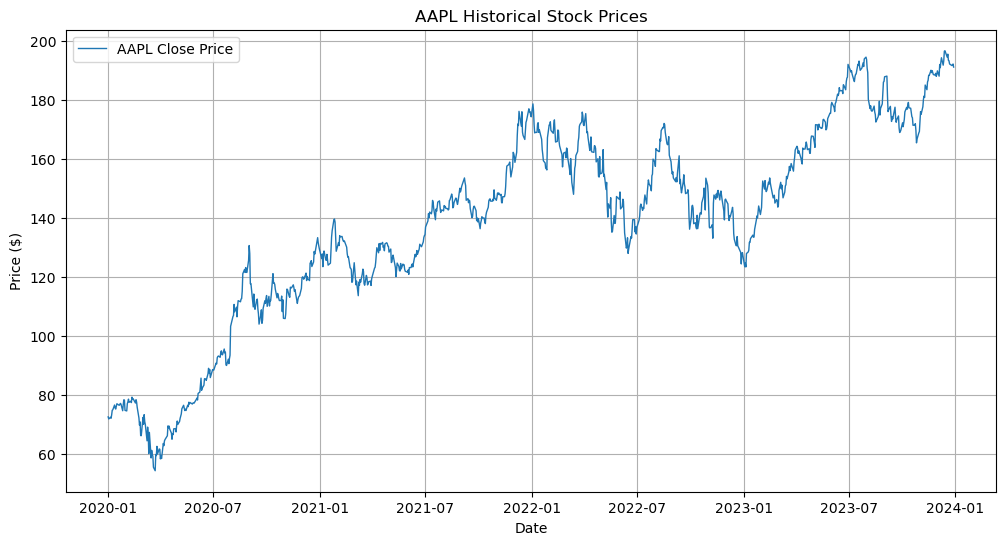

In [6]:
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-12-31"
data = yf.download(ticker, start = start_date, end = end_date)
prices = data['Close'].values
dates = data.index.to_numpy()

plt.figure(figsize=(12, 6))
plt.plot(dates, prices, label=f"{ticker} Close Price", linewidth=1)
plt.title(f"{ticker} Historical Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.show()

We next calculate the historical log returns. 

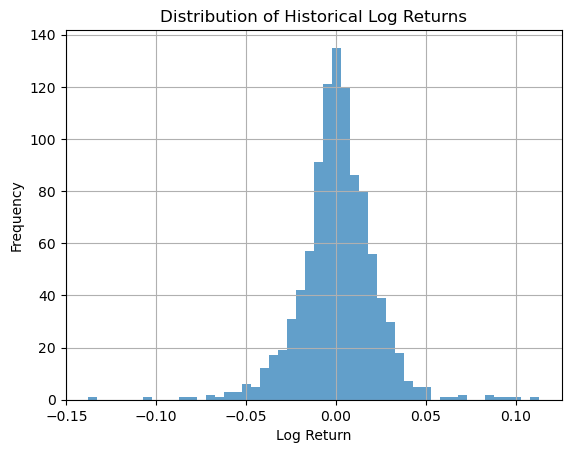

In [8]:
returns = np.log(prices[1:]/prices[:-1]).flatten()
plt.hist(returns, bins=50, alpha=0.7)
plt.title("Distribution of Historical Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Next, we do a historical simulation for future stock prices.

**1st Method: Single-Day Price Forecast**

/var/folders/l1/pn2dqbmd573g0g_zcgxfc2sh0000gn/T/ipykernel_12636/186453687.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_price = float(prices[-1])


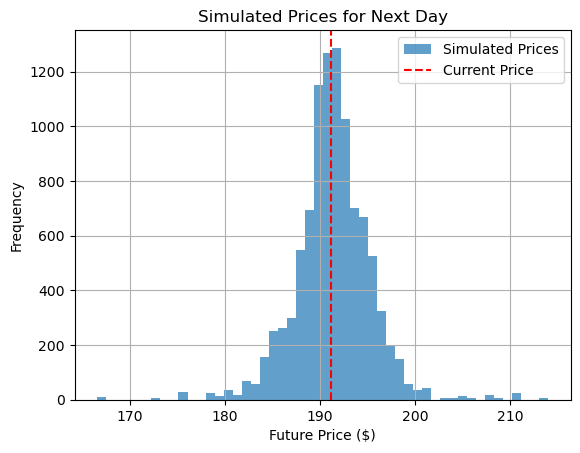

AAPL Current Price: $191.13

Mean forecast: $191.34
5th percentile: $184.97
95th percentile: $197.41


In [11]:
def hist_simulation_single(current_price, returns, n_simulations=10000):
    returns = np.asarray(returns).flatten()
    random_returns = np.random.choice(returns, size=n_simulations)
    return current_price * np.exp(random_returns)

current_price = float(prices[-1])
simulated_prices = hist_simulation_single(current_price, returns)

plt.hist(simulated_prices, bins=50, alpha=0.7, label="Simulated Prices")
plt.axvline(current_price, color="red", linestyle = "--", label="Current Price")
plt.title("Simulated Prices for Next Day")
plt.xlabel("Future Price ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.show()

print(f"{ticker} Current Price: ${current_price:.2f}\n")
print(f"Mean forecast: ${np.mean(simulated_prices):.2f}")
print(f"5th percentile: ${np.percentile(simulated_prices, 5):.2f}")
print(f"95th percentile: ${np.percentile(simulated_prices, 95):.2f}")

What the above means is that if today's price is 191.13, there is a 90% change that AAPL's price tomorrow will be between 184.93 and 197.61. 

**2nd Method: Multi-Day Price Forecast (Bootstrapping)**

[]

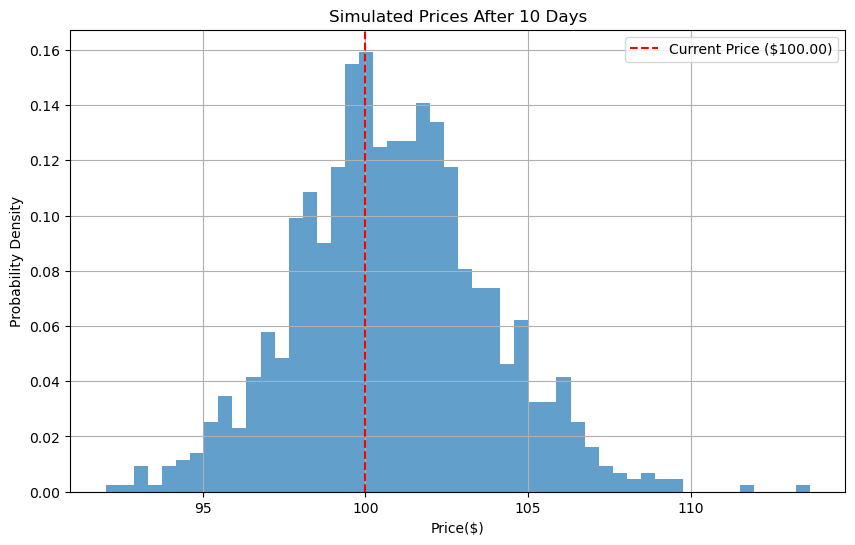

In [15]:
def hist_simulation_multi(current_price, returns, days=10, n_simulations=10000):
    sampled_returns = np.random.choice(returns, size=(n_simulations, days))
    cumulative_returns = np.sum(sampled_returns, axis=1)
    simulated_prices = current_price * np.exp(cumulative_returns)
    return simulated_prices 

if __name__ == "__main__":
    np.random.seed(42)
    returns = np.random.normal(loc=0.0005, scale=0.01, size=1000)
    current_price = 100
    days = 10
    n_simulations = 1000
    simulated_prices= hist_simulation_multi(current_price, returns, days, n_simulations)

plt.figure(figsize=(10,6))
plt.hist(simulated_prices, bins=50, alpha=0.7, density=True)
plt.axvline(current_price, color="red", linestyle="--", label=f"Current Price (${current_price:.2f})")
plt.title(f"Simulated Prices After {days} Days")
plt.xlabel("Price($)")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.plot()